# Australia's Favourite Restaurants- DataFrames and Plots

An analysis of Australian dining habits using data from Zomato, Gourmet Traveller and the Good Food Guide.

In [1]:
#Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from api_key import apikey 
from api_key import g_key 
from pytrends.request import TrendReq

In [56]:
#Set Search URL for Melbourne
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=259&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data1 = requests.get(search_url, headers={"user-key" : apikey}).json()

#Get Total Restaurants
total_mel = data1["results_found"]

<Response [200]>


In [57]:
#Set Search URL for Sydney
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=260&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data2 = requests.get(search_url, headers={"user-key" : apikey}).json()

#Get Total Restaurants
total_syd = data2["results_found"]

<Response [200]>


In [59]:
#Set Search URL for Perth
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=296&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data3 = requests.get(search_url, headers={"user-key" : apikey}).json()

#Get Total Restaurants
total_per = data3["results_found"]

<Response [200]>


In [60]:
#Find Number of Restaurants 
resto_total = total_mel + total_syd + total_per 

#Print Number of Restaurants
print(f"The number of restaurants combined in Melbourne, Sydney and Perth is {resto_total}")

The number of restaurants combined in Melbourne, Sydney and Perth is 38814


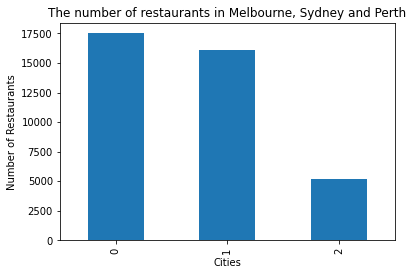

In [74]:
Melbourne = total_mel
Sydney = total_syd 
Perth = total_per 

restaurants = [Melbourne, Sydney, Perth]

resto_plot = pd.DataFrame(restaurants)

#Plot as Number of Restaurants in each city as a Bar Graph
resto_plot.plot(kind='bar')
plt.title('The number of restaurants in Melbourne, Sydney and Perth')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurants')
plt.gca().get_legend().remove()

#Save as PNG
plt.savefig("Images/RestaurantsPerCity.png")

In [61]:
#Set City IDs
cityid = [296,259,260]

#Create Empty Lists
rest_id_list = []
rest_name_list =[]
rest_cuis_list = []
rest_local_list = []
rest_city_list = []
rest_lat_list = []
rest_long_list = []
rest_rate_list = []
rest_delivery_list = []
rest_ratenum_list = []

resto_num = 20
loop_num = 0
show_page = 0

#Create For Loop
for citynum in cityid:
    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
    data = requests.get(search_url, headers={"user-key" : apikey}).json()
    for page in range(5):
        for count in range(resto_num):
            try: 
                rest_id = data["restaurants"][count]["restaurant"]["id"]
                rest_name = data["restaurants"][count]["restaurant"]["name"]
                rest_cuis = data["restaurants"][count]["restaurant"]["cuisines"]
                rest_local = data["restaurants"][count]["restaurant"]["location"]["locality"]
                rest_city = data["restaurants"][count]["restaurant"]["location"]["city"]
                rest_lat = data["restaurants"][count]["restaurant"]["location"]["latitude"]
                rest_long = data["restaurants"][count]["restaurant"]["location"]["longitude"]
                rest_rate_num = data["restaurants"][count]["restaurant"]["all_reviews_count"]
                rest_rate = data["restaurants"][count]["restaurant"]["user_rating"]["aggregate_rating"]
                rest_delivery = data["restaurants"][count]["restaurant"]["highlights"]
                
                #Check if they Deliver 
                theydelivery = False
                for doesdelivery in rest_delivery:
                    if doesdelivery == 'Delivery':
                        theydelivery = True

                if theydelivery == True:
                    rest_delivery = "Yes"
                else:
                    rest_delivery = "No"

                #Append Results to List
                rest_id_list.append(rest_id)
                rest_name_list.append(rest_name)
                rest_cuis_list.append(rest_cuis)
                rest_local_list.append(rest_local)
                rest_city_list.append(rest_city)
                rest_lat_list.append(rest_lat)
                rest_long_list.append(rest_long)
                rest_rate_list.append(rest_rate)
                rest_ratenum_list.append(rest_rate_num)
                rest_delivery_list.append(rest_delivery)
                
                #Repeat
                if count == 19:
                    show_page = show_page + 20
                    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
                    data = requests.get(search_url, headers={"user-key" : apikey}).json()
                    count = 0
            except:
                print("error")
    count = 0
    page = 0
    show_page = 0


#Check for Errors
try:            
    restaurants_df = pd.DataFrame({
        "Restaurant ID":rest_id_list,
        "Name":rest_name_list,
        "Cuisine":rest_cuis_list,
        "Locality":rest_local_list,
        "City":rest_city_list,
        "Latitude":rest_lat_list,
        "Longitude":rest_long_list,
        "Rating":rest_rate_list,
        "Total Number Ratings": rest_ratenum_list,
        "Delivery":rest_delivery_list
    })
except:
    print(len(rest_id_list))
    print(len(rest_name_list))
    print(len(rest_cuis_list))
    print(len(rest_local_list))
    print(len(rest_city_list))
    print(len(rest_lat_list))
    print(len(rest_long_list))
    print(len(rest_rate_list))
    print(len(rest_review_list))
    print(len(rest_delivery_list))
    
#Drop Duplicate Results    
restaurants_df = restaurants_df.drop_duplicates()

#Print DataFrame
restaurants_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16600038,Bib & Tucker,"Modern Australian, Cafe Food",North Fremantle,Perth,-32.0284215000,115.7498293000,4.1,692,No
1,16597645,Mrs. S,"Patisserie, Cafe Food",Maylands,Perth,-31.9286800875,115.8919624239,4.5,643,No
2,18196379,tbsp.,"Sandwich, Coffee and Tea, Cafe Food",Bayswater,Perth,-31.9194560000,115.9096643000,4.7,335,No
3,16598431,Tuck Shop Cafe,"Modern Australian, Cafe Food",Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
4,16599082,Sayers Sister,"Modern Australian, Coffee and Tea",Perth CBD,Perth,-31.9404785312,115.8615736663,4.6,496,No
...,...,...,...,...,...,...,...,...,...,...
295,18494965,Sasaki,Japanese,CBD,Sydney,-33.8780010640,151.2104998156,4.3,67,No
296,18518832,The Grounds of the City,"Cafe Food, Coffee and Tea",CBD,Sydney,-33.8721590260,151.2070344016,4.2,243,No
297,16559582,Spice Temple,"Chinese, Fusion, Yum Cha",CBD,Sydney,-33.8661222694,151.2100026011,4.3,244,No
298,17744545,Gogyo,"Japanese, Ramen",Surry Hills,Sydney,-33.8823602716,151.2101410702,4.5,120,No


In [6]:
#Save DataFrame as CSV
restaurants_df.to_csv("Multi_Restaurant_Data.csv", encoding="utf-8", index=False)

In [7]:
#Number of Restaurants that Deliver
restaurants_df["Delivery"].value_counts()

No     272
Yes     27
Name: Delivery, dtype: int64

In [8]:
#Sort DataFrame by Rating
restaurants_df = restaurants_df.sort_values(by=["Rating"],ascending=False)

#Print DataFrame
reshaped = \
(restaurants_df.set_index(restaurants_df.columns.drop('Cuisine',1).tolist())
   .Cuisine.str.split(', ', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Cuisine'})
   .loc[:, restaurants_df.columns]
)

reshaped_df = pd.DataFrame(reshaped)
reshaped_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16598976,Marumo,Japanese,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
1,16598976,Marumo,Seafood,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
2,16598976,Marumo,Modern Australian,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
3,16586014,Minamishima,Japanese,Richmond,Melbourne,-37.8198314176,145.0051938370,4.9,293,No
4,16586014,Minamishima,Sushi,Richmond,Melbourne,-37.8198314176,145.0051938370,4.9,293,No
...,...,...,...,...,...,...,...,...,...,...
648,16599918,Jamie's Italian,Italian,Perth CBD,Perth,-31.9517195884,115.8580579609,3.8,1473,No
649,16598361,The Wild Fig Cafe,Modern Australian,Scarborough,Perth,-31.8979994965,115.7571093366,3.3,709,No
650,16598361,The Wild Fig Cafe,Cafe Food,Scarborough,Perth,-31.8979994965,115.7571093366,3.3,709,No
651,16601603,Lucky Chan's Laundry + Noodlebar,Asian,Northbridge,Perth,-31.9465239852,115.8608149365,2.9,389,No


In [9]:
#Count Number of Cuisines
top_cuisines = reshaped_df["Cuisine"].value_counts()

#Get Top 10
top_10_cuisines = top_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_cuisines

Cafe Food            94
Coffee and Tea       85
Japanese             61
Modern Australian    50
Desserts             24
                     ..
Vegan                 1
Grill                 1
Turkish               1
Cantonese             1
Brazilian             1
Name: Cuisine, Length: 64, dtype: int64

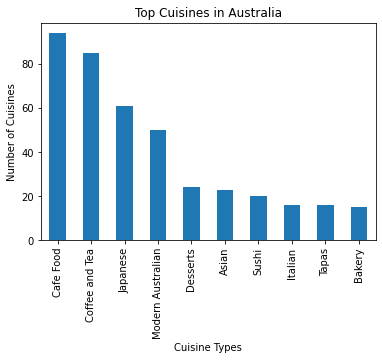

In [76]:
#Plot as Bar Graph
top_10_cuisines.plot(kind='bar')

plt.title('Top Cuisines in Australia')
plt.xlabel('Cuisine Types')
plt.ylabel('Number of Cuisines')

#Save as PNG
plt.savefig("Images/Top10Cuisines.png")

In [11]:
#Get Top Restaurants in Perth
perth_top = reshaped_df.loc[reshaped_df["City"]=="Perth"]

#Print DataFrame
perth_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16598976,Marumo,Japanese,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
1,16598976,Marumo,Seafood,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
2,16598976,Marumo,Modern Australian,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
13,16598837,Run Amuk,Fast Food,"Orient Street, South Fremantle",Perth,-32.0722768677,115.7530652359,4.9,341,No
41,16597513,Pacific Rim Mix Plate,Hawaiian,Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
42,16597513,Pacific Rim Mix Plate,Japanese,Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
43,16598168,Nobu Perth,Japanese,Burswood,Perth,-31.9605255258,115.8940253779,4.8,663,No
44,16598168,Nobu Perth,Sushi,Burswood,Perth,-31.9605255258,115.8940253779,4.8,663,No
64,16596036,Ha-Lu,Japanese,"Oxford Street, Leederville",Perth,-31.9233773227,115.8411462978,4.8,243,No
65,16596036,Ha-Lu,Tapas,"Oxford Street, Leederville",Perth,-31.9233773227,115.8411462978,4.8,243,No


In [12]:
#Get Top Cuisines in Perth
top_P_cuisines = perth_top["Cuisine"].value_counts()

#Get Top 10 Cuisines in Perth
top_10_P_cuisines = top_P_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_P_cuisines

Cafe Food            31
Modern Australian    27
Japanese             16
Coffee and Tea       14
Tapas                11
Sushi                 9
Italian               8
Bar Food              6
Asian                 6
Burger                5
European              5
Mediterranean         4
Sandwich              4
Mexican               3
BBQ                   3
Healthy Food          3
Malaysian             3
Middle Eastern        3
Desserts              3
Spanish               3
Bakery                3
Pizza                 3
American              2
Australian            2
Thai                  2
Steak                 2
Seafood               2
Fast Food             2
Chinese               2
French                2
Beverages             1
Fusion                1
Greek                 1
Korean                1
Hawaiian              1
Vietnamese            1
Patisserie            1
Ramen                 1
Latin American        1
Street Food           1
Brazilian             1
Name: Cuisine, d

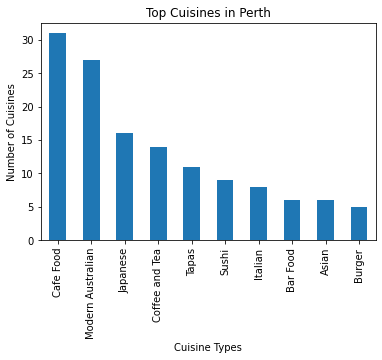

In [77]:
#Plot Top 10 Cuisines in Perth
top_10_P_cuisines.plot(kind='bar')

plt.title('Top Cuisines in Perth')
plt.xlabel('Cuisine Types')
plt.ylabel('Number of Cuisines')

#Save as PNG
plt.savefig("Images/Top10CuisinesPerth.png")

In [14]:
#Get Top Restaurants in Melbourne
melbourne_top = reshaped_df.loc[reshaped_df["City"]=="Melbourne"]

#Print DataFrame
melbourne_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
3,16586014,Minamishima,Japanese,Richmond,Melbourne,-37.8198314176,145.0051938370,4.9,293,No
4,16586014,Minamishima,Sushi,Richmond,Melbourne,-37.8198314176,145.0051938370,4.9,293,No
5,16577212,Beatrix,Coffee and Tea,North Melbourne,Melbourne,-37.8023673299,144.9444753304,4.9,384,No
6,16577212,Beatrix,Bakery,North Melbourne,Melbourne,-37.8023673299,144.9444753304,4.9,384,No
7,18097646,Agathé Pâtisserie,Bakery,"South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No
8,18097646,Agathé Pâtisserie,Patisserie,"South Melbourne Market, South Melbourne",Melbourne,-37.8325827938,144.9569066986,4.9,319,No
9,16583248,Pidapipó,Ice Cream,Carlton,Melbourne,-37.7983310261,144.9671862647,4.9,525,No
10,16583248,Pidapipó,Desserts,Carlton,Melbourne,-37.7983310261,144.9671862647,4.9,525,No
11,16585905,Tipo 00,Italian,CBD,Melbourne,-37.8135277429,144.9619733915,4.9,721,No
19,16573759,Le Petit Gateau,French,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No


In [15]:
#Get Top Cuisines in Melbourne
top_M_cuisines = melbourne_top["Cuisine"].value_counts()

#Get Top 10 Cuisines in Melbourne
top_10_M_cuisines = top_M_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_M_cuisines

Coffee and Tea       36
Cafe Food            31
Japanese             22
Desserts             10
Asian                 9
Sushi                 8
Modern Australian     8
Korean                6
Bakery                5
French                5
Steak                 4
Australian            4
Korean BBQ            3
Thai                  3
Contemporary          3
Ice Cream             3
Tapas                 3
American              3
Japanese BBQ          3
Chinese               3
Asian Fusion          3
Fusion                3
Italian               3
Middle Eastern        2
Pizza                 2
BBQ                   2
Mediterranean         2
Patisserie            2
Ramen                 2
European              2
Taiwanese             2
Vegan                 1
Healthy Food          1
Hot Pot               1
Mexican               1
Spanish               1
Dumplings             1
Burger                1
Bar Food              1
Modern European       1
Latin American        1
Israeli         

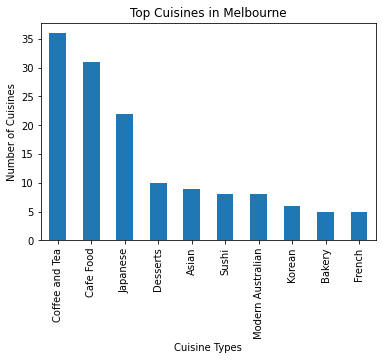

In [78]:
#Plot Top 10 Cuisines in Melbourne
top_10_M_cuisines.plot(kind='bar')


plt.title('Top Cuisines in Melbourne')
plt.xlabel('Cuisine Types')
plt.ylabel('Number of Cuisines')

#Save as PNG
plt.savefig("Images/Top10CuisinesMel.png")

In [17]:
#Get Top Restaurants in Sydney
sydney_top = reshaped_df.loc[reshaped_df["City"]=="Sydney"]

#Print DataFrame
sydney_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
12,16568476,La Mamma del Gelato Anita,Ice Cream,"Central Park, Chippendale",Sydney,-33.8850718252,151.2004720420,4.9,231,No
14,15547004,Restaurant Hubert,French,CBD,Sydney,-33.8653806250,151.2104904279,4.9,231,No
15,15547004,Restaurant Hubert,European,CBD,Sydney,-33.8653806250,151.2104904279,4.9,231,No
16,16562433,Cow & The Moon,Ice Cream,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
17,16562433,Cow & The Moon,Desserts,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
18,16562433,Cow & The Moon,Coffee and Tea,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
22,16558798,Quay,Modern Australian,Circular Quay,Sydney,-33.8580292558,151.2099704146,4.9,452,No
27,15545439,Manpuku - Chatswood,Japanese,Chatswood,Sydney,-33.7943935138,151.1895571277,4.9,196,No
28,15545439,Manpuku - Chatswood,Ramen,Chatswood,Sydney,-33.7943935138,151.1895571277,4.9,196,No
29,16566535,Lorraine's Patisserie,Desserts,"Ivy, CBD",Sydney,-33.8666116843,151.2077032775,4.9,111,No


In [18]:
#Get Cuisines in Sydney
top_S_cuisines = sydney_top["Cuisine"].value_counts()

#Get Top 10 Cuisines in Sydney
top_10_S_cuisines = top_S_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_S_cuisines

Coffee and Tea       35
Cafe Food            32
Japanese             23
Modern Australian    15
Desserts             11
Salad                 9
Asian                 8
Bakery                7
Ramen                 7
Chinese               6
French                5
Italian               5
Seafood               4
Steak                 4
Sushi                 3
Fried Chicken         3
Fusion                3
Yum Cha               3
Ice Cream             3
Healthy Food          3
Thai                  3
Burger                2
American              2
Taiwanese             2
European              2
Tapas                 2
Mexican               2
Sandwich              2
Poké                  2
Juices                2
Japanese BBQ          2
Bar Food              2
BBQ                   2
Malaysian             2
Hot Pot               2
Asian Fusion          2
Vegetarian            1
Spanish               1
Tea                   1
Fast Food             1
Beverages             1
Pizza           

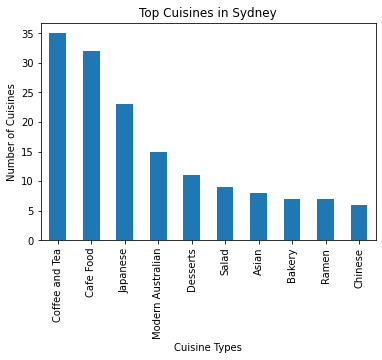

In [79]:
#Plot Top 10 Cuisines in Sydney
top_10_S_cuisines.plot(kind='bar')


plt.title('Top Cuisines in Sydney')
plt.xlabel('Cuisine Types')
plt.ylabel('Number of Cuisines')

#Save as PNG
plt.savefig("Images/Top10CuisinesSydney.png")

In [26]:
#Get Zomato Restaurant CSV file
multi_city = "Multi_Restaurant_Data.csv"

#Read Zomato Restaurant CSV file
multi_df = pd.read_csv(multi_city)

#Get Gourmet Traveller 2019 Ratings CSV file
gt_resto_rating = "GT_Top_Restaurants.csv"

#Read Gourmet Traveller 2019 Ratings CSV file
gt_resto_rating_df = pd.read_csv(gt_resto_rating)

#Get Gourmet Traveller 2019 without Ratings CSV file
gt_resto = "GT_Top_Resto.csv"

#Read Gourmet Traveller 2019 without Ratings CSV file
gt_resto_df = pd.read_csv(gt_resto)

#Get Good Food Guide 2020 Ratings CSV file
gf_resto_rating = "GF_Top_Restaurants.csv"

#Read Good Food Guide 2020 Ratings CSV file
gf_resto_rating_df = pd.read_csv(gf_resto_rating)

#Get Good Food Guide 2020 without Ratings CSV file
gf_resto = "GF_Top_Resto.csv"

#Read Good Food Guide 2020 without Ratings CSV file
gf_resto_df = pd.read_csv(gf_resto)

In [27]:
#Print Gourmet Traveller 2019 Ratings without Ratings DataFrame
gt_resto_rating_df

,Rating,Name,City,Latitude,Longitude
0,1,Quay,Sydney,-33.857606,151.207970
1,2,Momofuku Seiobo,Sydney,-33.869509,151.193575
2,3,Orana,Adelaide,-34.922622,138.607939
3,4,Attica,Melbourne,-37.877005,144.995120
4,5,Brae,Melbourne,-38.346922,143.805033
...,...,...,...,...,...
95,96,Yellow,Sydney,-33.868693,151.223245
96,97,Bar Lourinhã,Melbourne,-37.812811,144.970330
97,98,Gerard's Bistro,Brisbane,-27.456514,153.036807
98,99,St Isidore,Sydney,-35.320556,150.430867


In [28]:
#Merge Zomato Restaurant and Gourmet Traveller 2019 without Ratings DataFrames
merged_gtzom_resto = pd.merge(multi_df, gt_resto_df, on='Name', how='inner')

#Print DataFrame
merged_gtzom_resto

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16597743,Rockpool Bar & Grill,"Steak, Modern Australian, Bar Food",Burswood,Perth,-31.961158,115.894267,4.2,791,No
1,16572235,Rockpool Bar & Grill,"Seafood, Steak, Australian","Crown Melbourne, Southbank",Melbourne,-37.821970,144.960356,4.5,1094,No
2,16559790,Rockpool Bar & Grill,"Seafood, Steak, Modern Australian, Poké",CBD,Sydney,-33.866030,151.210022,4.6,397,No
3,16586014,Minamishima,"Japanese, Sushi",Richmond,Melbourne,-37.819831,145.005194,4.9,293,No
4,16573067,Cutler & Co,Modern Australian,Fitzroy,Melbourne,-37.805571,144.975943,4.7,569,No
5,15547004,Restaurant Hubert,"French, European",CBD,Sydney,-33.865381,151.210490,4.9,231,No


In [29]:
#Print Good Food Guide 2020 Ratings
gf_resto_rating_df

,Name,City,Latitude,Longitude,Rating
0,Quay,Sydney,-33.857606,151.207970,3
1,Sixpenny,Sydney,-33.892536,151.162530,3
2,Attica,Melbourne,-37.877005,144.995120,3
3,Brae,Melbourne,-38.346922,143.805033,3
4,Minamishima,Melbourne,-37.819748,145.002904,3
...,...,...,...,...,...
192,Rockpool Bar and Grill,Perth,-31.961176,115.892067,1
193,Vasse Felix,Perth,-33.822464,115.035537,1
194,Wildflower,Perth,-32.950910,114.306012,1
195,Yarri,Perth,-33.615113,115.102250,1


In [31]:
#Merge Zomato Restaurant and Good Food Guide 2020 without Ratings DataFrames
merged_gfzom_resto = pd.merge(multi_df, gf_resto_df, on='Name', how='inner')

#Print DataFrame
merged_gfzom_resto

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16595766,Balthazar,"European, Modern Australian",Perth CBD,Perth,-31.956594,115.858169,4.5,285,No
1,16585905,Tipo 00,Italian,CBD,Melbourne,-37.813528,144.961973,4.9,721,No
2,16582897,Supernormal,"Asian, Fusion",CBD,Melbourne,-37.816048,144.968372,4.5,1023,No
3,16571189,Cumulus Inc.,"Modern European, Contemporary",CBD,Melbourne,-37.814794,144.973136,4.7,1124,No
4,16586014,Minamishima,"Japanese, Sushi",Richmond,Melbourne,-37.819831,145.005194,4.9,293,No
5,16570775,Attica,"Australian, Contemporary",Ripponlea,Melbourne,-37.876924,144.997312,4.8,495,No
6,16573419,Coda,"Asian, Fusion",CBD,Melbourne,-37.815822,144.969964,4.6,562,No
7,16564570,Sokyo,Japanese,"The Star, Pyrmont",Sydney,-33.869555,151.195900,4.8,573,No
8,16565634,Mr. Wong,"Cantonese, Chinese, Yum Cha","Establishment, CBD",Sydney,-33.864141,151.208141,4.5,647,No
9,15547004,Restaurant Hubert,"French, European",CBD,Sydney,-33.865381,151.210490,4.9,231,No
